<center>
<h3>Universidade Estadual do Ceará<br/>
Mestrado Acadêmico em Ciência da Computação<br/><br/>
Trabalho de Probabilidade e Processos Estocásticos</h3>
</center>

**Docente:** José Everardo Bessa Maia\
**Discente:** Gabriel Furtado Lins Melo

---

### Importando as bibliotecas

In [195]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.stats import norm, entropy

### Carregando os dados

In [183]:
X = np.genfromtxt('subsfin.txt')
print(X.shape)

(5760, 52)


### Visualizando os dados

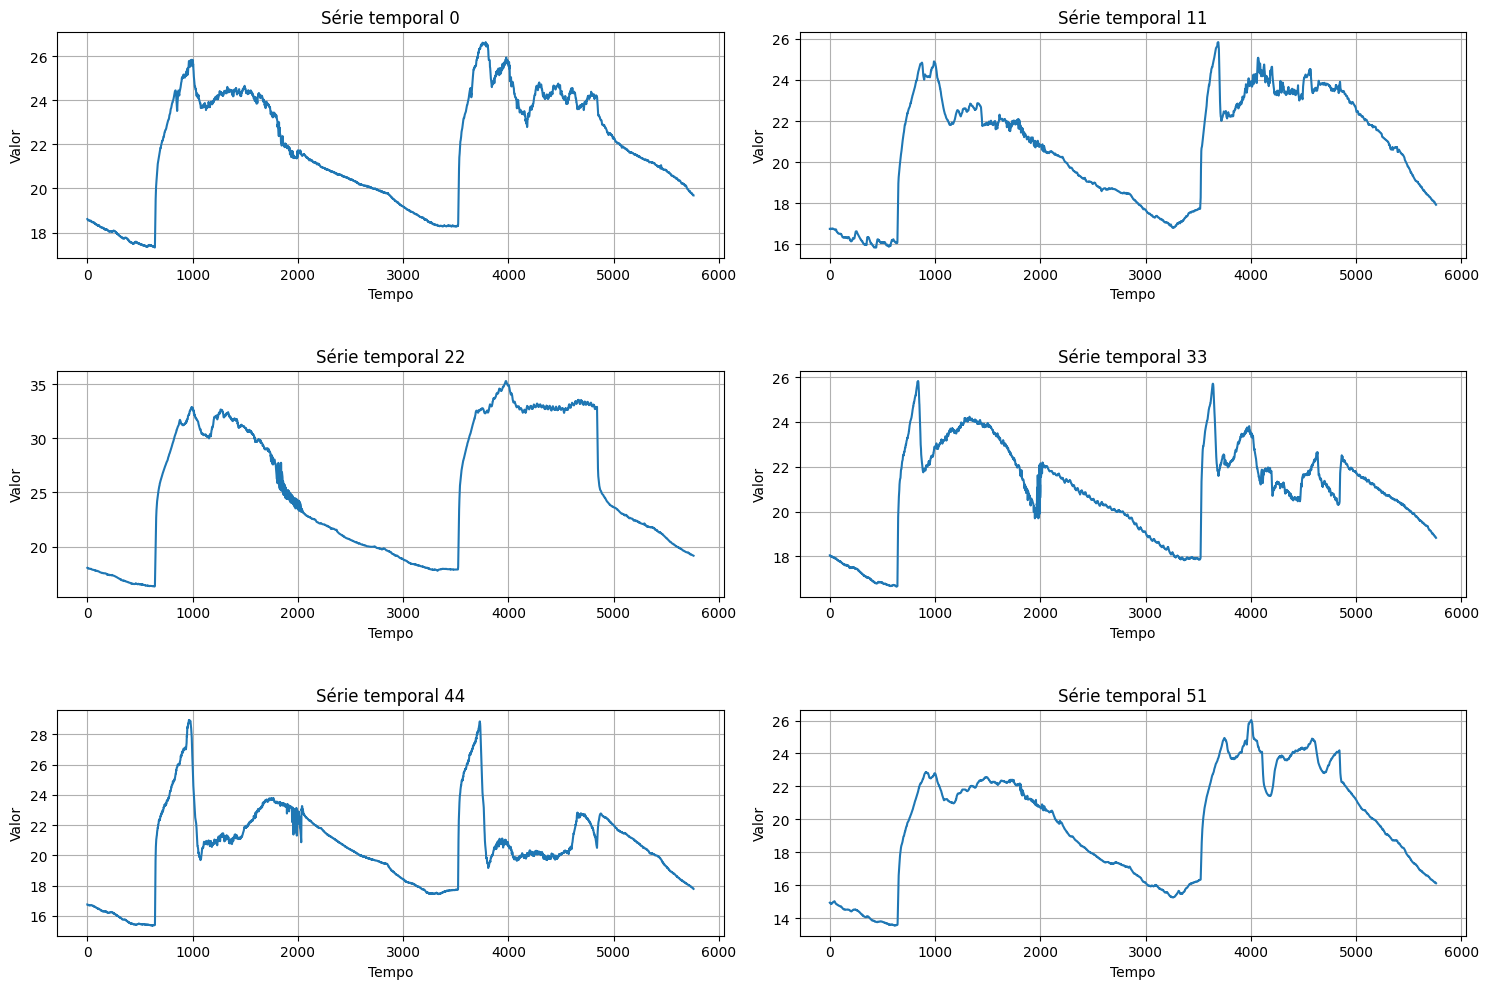

In [184]:
indices = [0, 11, 22, 33, 44, 51]

plt.figure(figsize=(15, 10))

for i, idx in enumerate(indices, 1):
    plt.subplot(3, 2, i)
    plt.plot(X[:, idx])
    plt.title(f'Série temporal {idx}')
    plt.xlabel('Tempo')
    plt.ylabel('Valor')
    plt.grid(True)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

### Obtendo as diferenças das séries temporais

Vamos trabalhar com as diferenças das séries temporais.

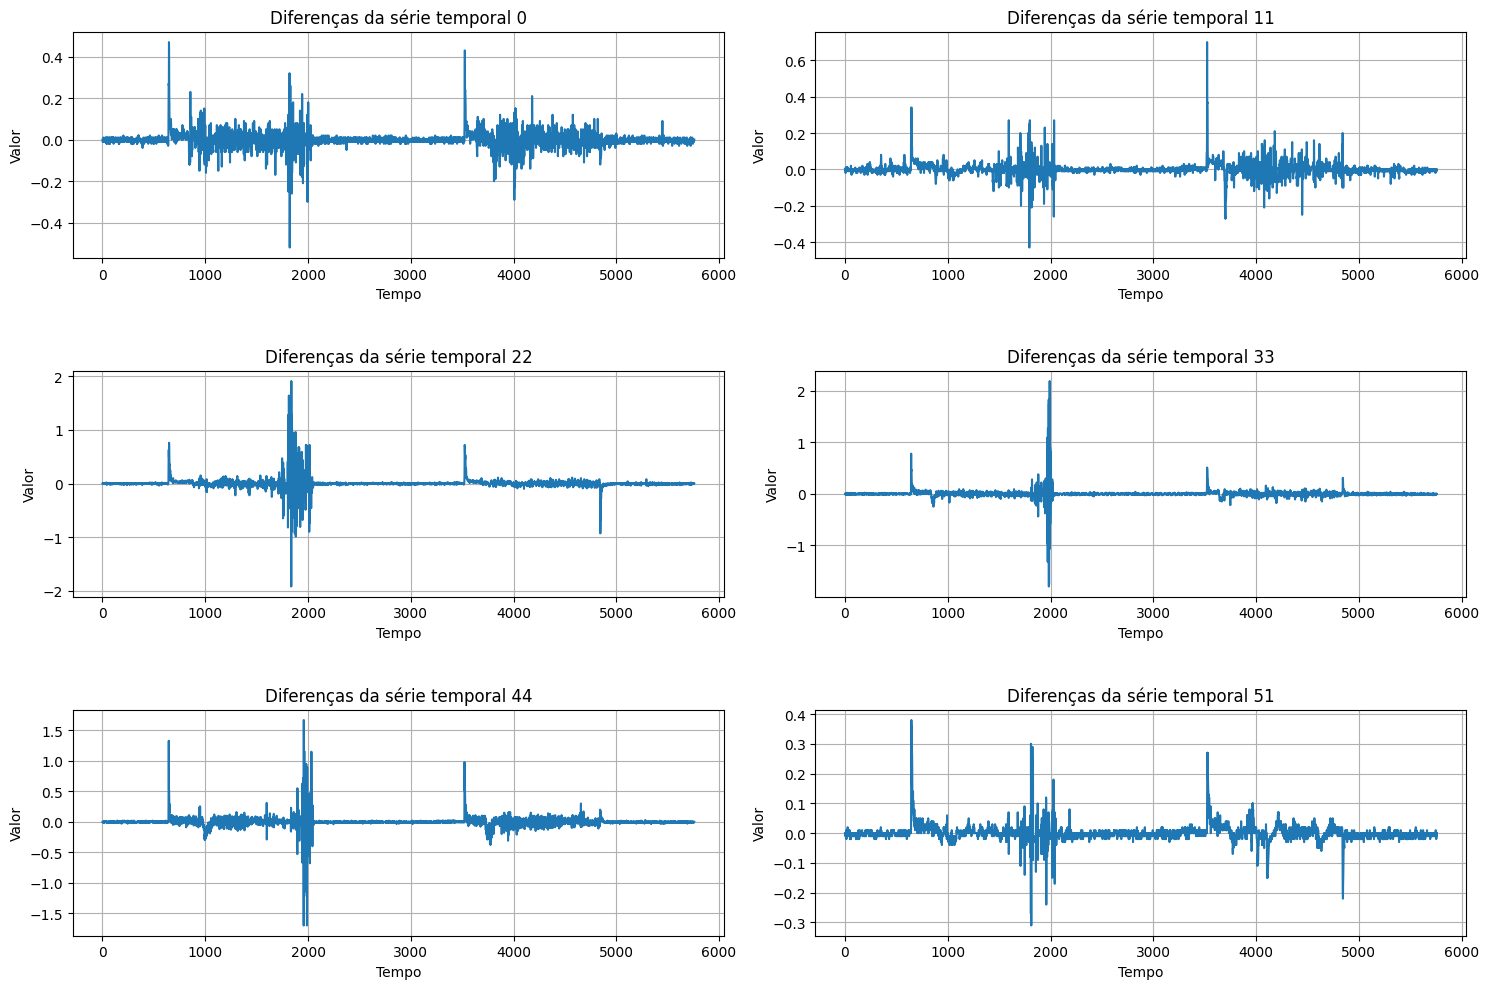

In [185]:
X_dif = np.zeros(X.shape)
for i in range(X.shape[0]-2):
    X_dif[i+1,:] = X[i+1,:] - X[i,:]

indices = [0, 11, 22, 33, 44, 51]

plt.figure(figsize=(15, 10))

for i, idx in enumerate(indices, 1):
    plt.subplot(3, 2, i)
    plt.plot(X_dif[:, idx])
    plt.title(f'Diferenças da série temporal {idx}')
    plt.xlabel('Tempo')
    plt.ylabel('Valor')
    plt.grid(True)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

### Transformando em Normal

Assumindo que os dados fossem normais, vamos aplicar a normal em cada coluna.

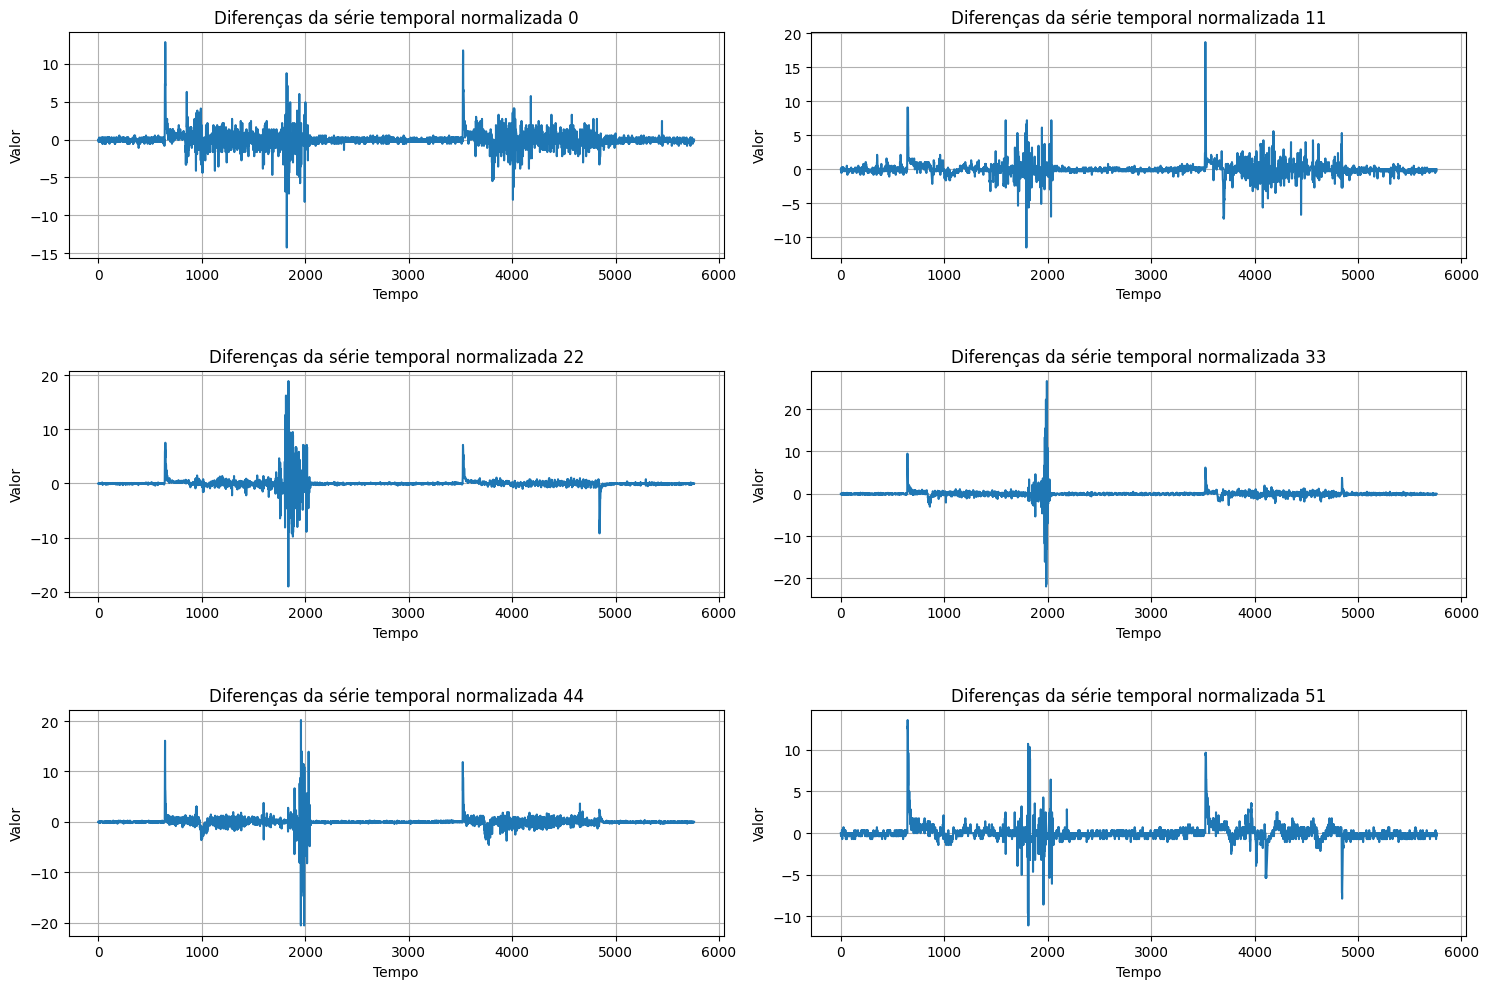

In [186]:
X_norm = (X_dif - np.mean(X_dif, axis=0)) / np.std(X_dif, axis=0)

indices = [0, 11, 22, 33, 44, 51]

plt.figure(figsize=(15, 10))

for i, idx in enumerate(indices, 1):
    plt.subplot(3, 2, i)
    plt.plot(X_norm[:, idx])
    plt.title(f'Diferenças da série temporal normalizada {idx}')
    plt.xlabel('Tempo')
    plt.ylabel('Valor')
    plt.grid(True)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

### Uniformizando

Vamos uniformizar as séries temporais através da aplicação do CDF da normal em cada coluna.

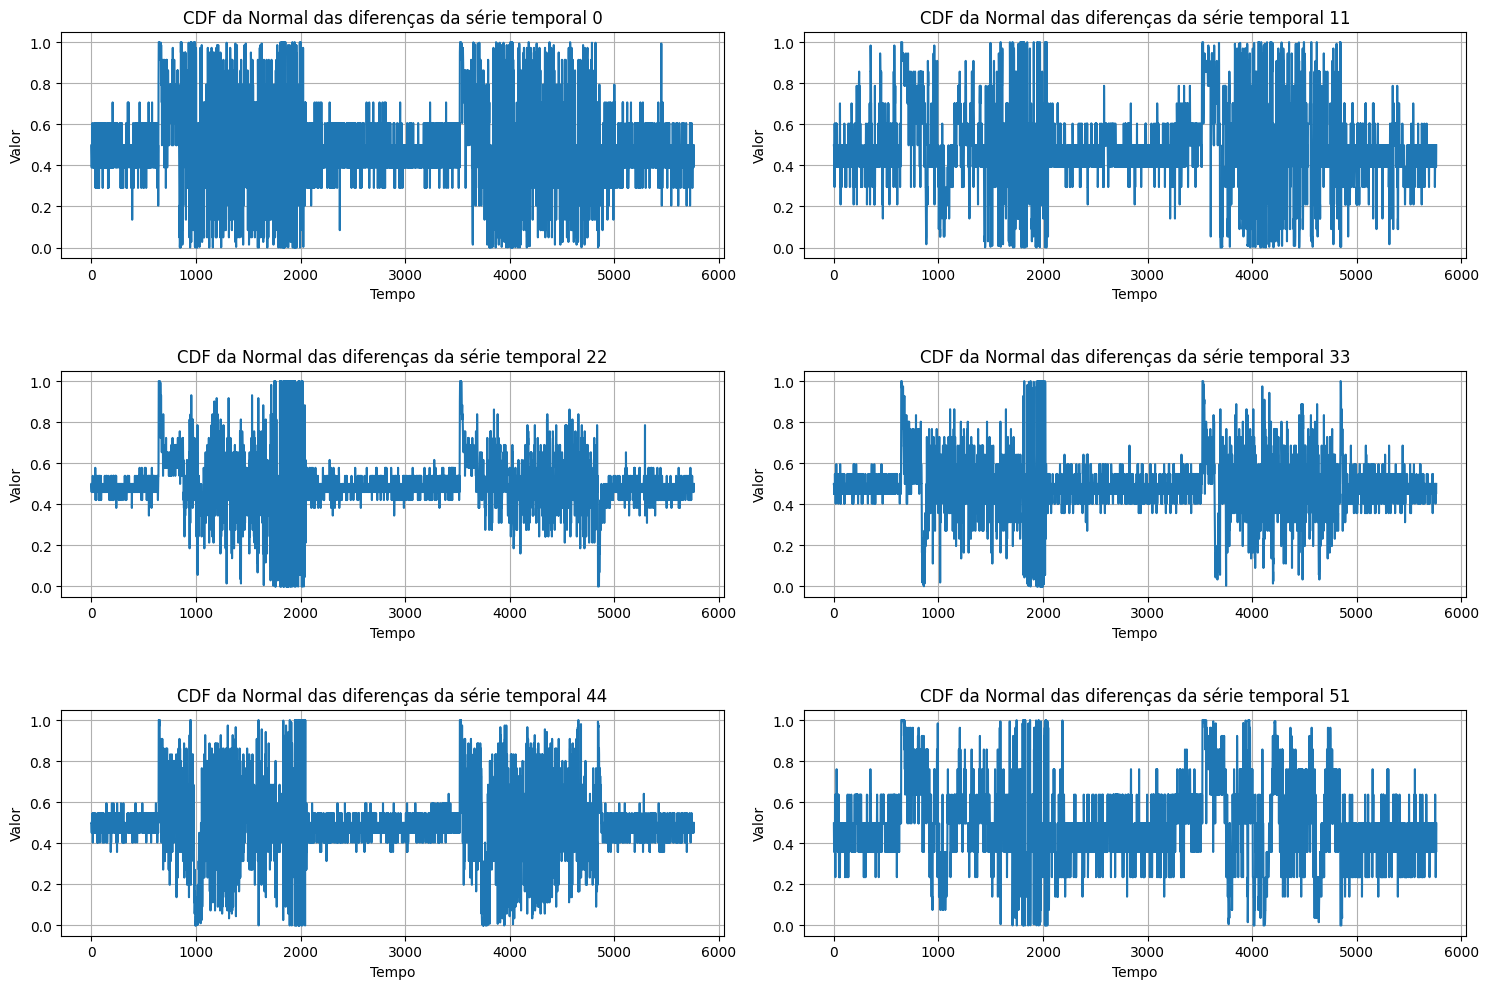

In [187]:
X_unif = norm.cdf(X_norm)

indices = [0, 11, 22, 33, 44, 51]

plt.figure(figsize=(15, 10))

for i, idx in enumerate(indices, 1):
    plt.subplot(3, 2, i)
    plt.plot(X_unif[:, idx])
    plt.title(f'CDF da Normal das diferenças da série temporal {idx}')
    plt.xlabel('Tempo')
    plt.ylabel('Valor')
    plt.grid(True)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

### Calculando a matriz de entropia de cópulas

In [189]:
num_cols = X_unif.shape[1]

entropy_matrix = np.zeros((num_cols, num_cols))

for i in range(num_cols):
    for j in range(num_cols):
        if i != j:
            entropy_matrix[i, j] = entropy(X_unif[:, i], X_unif[:, j])

print(entropy_matrix)

[[0.         0.22364862 0.26332925 ... 0.23906029 0.21706376 0.21173395]
 [0.25776987 0.         0.26453274 ... 0.23139742 0.24017966 0.28077165]
 [0.25339955 0.20500401 0.         ... 0.2378934  0.21312259 0.21598337]
 ...
 [0.30802694 0.2022868  0.27385341 ... 0.         0.14030547 0.19999242]
 [0.25874109 0.18238556 0.25163267 ... 0.10851733 0.         0.13287005]
 [0.2508375  0.17991682 0.24358135 ... 0.15908175 0.16098515 0.        ]]


### Comparações

In [194]:
min_indices = np.argmin(entropy_matrix, axis=1)
max_indices = np.argmax(entropy_matrix, axis=1)

for i in range(entropy_matrix.shape[0]):
    min_idx = min_indices[i]
    max_idx = max_indices[i]

    g1 = sns.jointplot(x=X_unif[:, i], y=X_unif[:, min_idx], kind='hex')
    g1.savefig(f"results/result_{i}_min.jpg")
    plt.close(g1.figure)
    
    g2 = sns.jointplot(x=X_unif[:, i], y=X_unif[:, max_idx], kind='hex')
    g2.savefig(f"results/result_{i}_max.jpg")
    plt.close(g2.figure)

### Visualizando as comparações

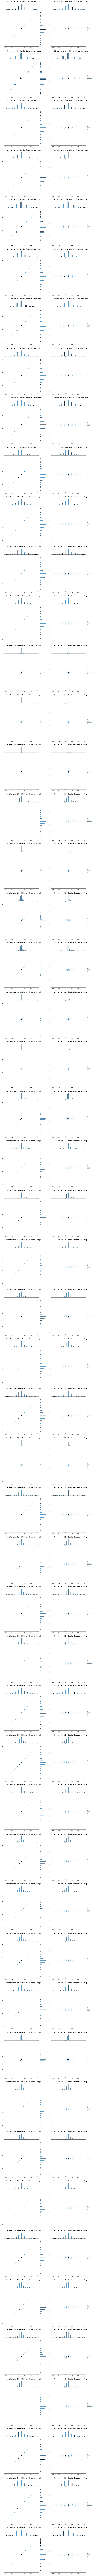

In [197]:
num_rows = entropy_matrix.shape[0]
fig, axs = plt.subplots(num_rows, 2, figsize=(12, 6*num_rows))

for i in range(num_rows):
    img_min = mpimg.imread(f"results/result_{i}_min.jpg")
    img_max = mpimg.imread(f"results/result_{i}_max.jpg")
    
    axs[i, 0].imshow(img_min)
    axs[i, 0].axis('off')
    axs[i, 0].set_title(f"Série temporal {i} x distribuição de menor entropia")
    
    axs[i, 1].imshow(img_max)
    axs[i, 1].axis('off')
    axs[i, 1].set_title(f"Série temporal {i} x distribuição de maior entropia")

plt.tight_layout()
plt.show()